In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [140]:
mdf = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")

## **Knowing the Data:~**

In [4]:
mdf

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [5]:
mdf.sample(10)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
946071,946071,e,9.14,x,s,n,f,e,c,p,...,NaN,i,n,NaN,NaN,f,f,p,d,u
1771918,1771918,e,6.89,f,i,n,f,e,c,p,...,NaN,NaN,w,NaN,NaN,t,r,NaN,w,a
2399404,2399404,e,2.57,b,y,n,f,NaN,c,k,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
1593585,1593585,p,1.27,x,s,y,f,f,f,f,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
957706,957706,e,15.55,f,y,w,f,NaN,NaN,w,...,s,NaN,n,NaN,NaN,t,m,NaN,m,a
1848238,1848238,p,3.50,x,s,e,f,a,c,o,...,NaN,NaN,e,NaN,NaN,f,f,NaN,g,a
2294529,2294529,e,7.40,f,t,o,f,s,NaN,n,...,NaN,i,n,NaN,NaN,f,f,NaN,d,a
2528574,2528574,p,1.54,p,t,n,f,a,c,n,...,NaN,t,y,NaN,NaN,t,e,NaN,m,u
2695331,2695331,p,6.85,x,h,r,f,NaN,c,w,...,NaN,NaN,w,u,w,t,p,NaN,d,a
202807,202807,p,10.44,x,e,n,t,p,NaN,o,...,NaN,NaN,u,NaN,NaN,f,f,NaN,d,a


In [141]:
mdf.set_index("id", inplace=True)

In [23]:
mdf.columns

Index(['class', 'cap_diameter', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_height', 'stem_width', 'stem_root', 'stem_surface', 'stem_color',
       'veil_type', 'veil_color', 'has_ring', 'ring_type', 'spore_print_color',
       'habitat', 'season'],
      dtype='object')

In [142]:
mdf.columns = mdf.columns.str.replace("-", "_", regex=True)
mdf.rename(columns={"class":"e_label"}, inplace=True)

In [88]:
mdf.isnull().sum()

e_label                       0
cap_diameter                  4
cap_shape                    40
cap_surface              671023
cap_color                    12
does_bruise_or_bleed          8
gill_attachment          523936
gill_spacing            1258435
gill_color                   57
stem_height                   0
stem_width                    0
stem_root               2757023
stem_surface            1980861
stem_color                   38
veil_type               2957493
veil_color              2740947
has_ring                     24
ring_type                128880
spore_print_color       2849682
habitat                      45
season                        0
dtype: int64

In [17]:
mdf[mdf.duplicated()]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,


### **Details of the Numerical Columns:~**

In [12]:
mdf.describe()

,cap-diameter,stem-height,stem-width
count,3.116941e+06,3.116945e+06,3.116945e+06
mean,6.309848e+00,6.348333e+00,1.115379e+01
std,4.657931e+00,2.699755e+00,8.095477e+00
min,3.000000e-02,0.000000e+00,0.000000e+00
25%,3.320000e+00,4.670000e+00,4.970000e+00
50%,5.750000e+00,5.880000e+00,9.650000e+00
75%,8.240000e+00,7.410000e+00,1.563000e+01
max,8.067000e+01,8.872000e+01,1.029000e+02


### **Details of the Categorical Columns:~**

In [135]:
mdf.describe(include="object")

Index(['e_label', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_root', 'stem_surface', 'stem_color', 'veil_type', 'veil_color',
       'has_ring', 'ring_type', 'spore_print_color', 'habitat', 'season'],
      dtype='object')

e_label
p    1705396
e    1411549
Name: count, dtype: int64

<Axes: ylabel='count'>

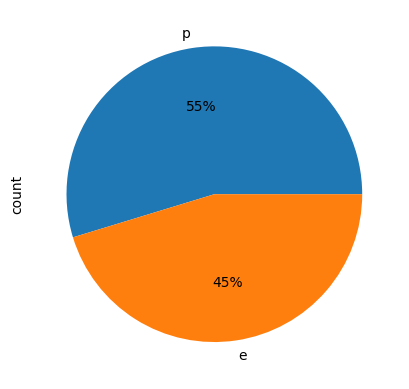

In [143]:
display(mdf.e_label.value_counts())
mdf.e_label.value_counts().plot(kind="pie", y=mdf.e_label.value_counts(), autopct="%1.00f%%")

In [91]:
mdf.shape

(3116828, 21)

In [92]:
mdf.cap_shape.value_counts()

cap_shape
x        1435975
f         676213
s         365124
b         318642
o         108833
          ...   
12.62          1
5.15           1
19.04          1
49.21          1
19.06          1
Name: count, Length: 74, dtype: int64

In [93]:
mdf.cap_shape.unique()

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', nan, 'w', 'k',
       'l', '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
       '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
       '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
       '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
       'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
       '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
       '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
       '6.53', '19.06'], dtype=object)

In [94]:
mdf[mdf.cap_shape.isin(list("fxpbocsdenwkltgzaruyimh")+[np.nan])].shape

(3116773, 21)

In [144]:
mdf = mdf[mdf.cap_shape.isin(list("fxpbocsdenwkltgzaruyimh")+[np.nan])]

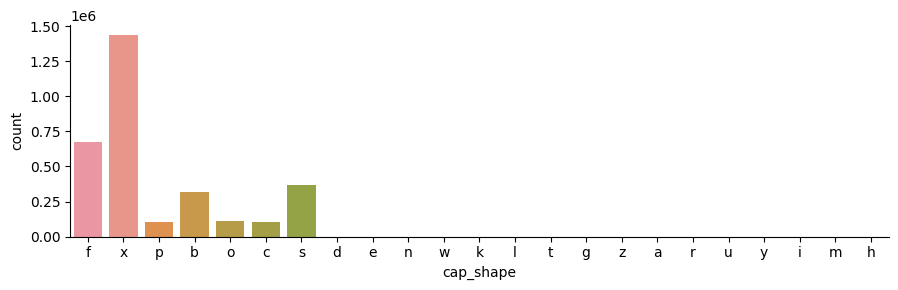

In [96]:
sns.catplot(mdf, kind="count", x ="cap_shape", height=3, aspect=3)

In [122]:
mdf.shape

(3116537, 21)

In [69]:
mdf.cap_surface.value_counts()

cap_surface
t        460771
s        384966
y        327816
h        284457
g        263720
          ...  
1.42          1
has h         1
10.83         1
8.96          1
0.87          1
Name: count, Length: 83, dtype: int64

In [145]:
mdf = mdf[mdf.cap_surface.isin(list("shyltegdiwkfnroauzpbmxc")+[np.nan])]

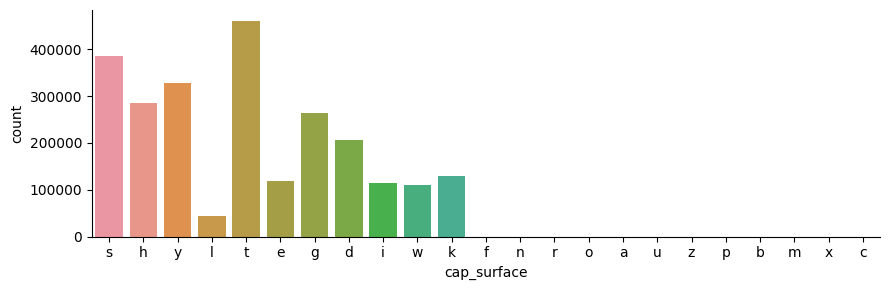

In [98]:
sns.catplot(mdf, kind="count", x ="cap_surface", height=3, aspect=3)

In [ ]:
mdf.shape

In [76]:
mdf.cap_color.value_counts()

cap_color
n             1359484
y              386606
w              379420
g              210820
e              197281
               ...   
3.95                1
6.59                1
5.25                1
veil-color          1
9.02                1
Name: count, Length: 78, dtype: int64

In [146]:
mdf = mdf[mdf.cap_color.isin(list("uobgwneyrpklihdsafcxmzt")+[np.nan])]

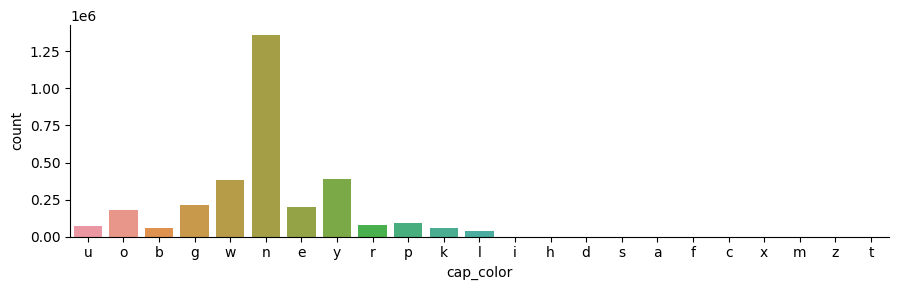

In [100]:
sns.catplot(mdf, kind="count", x ="cap_color", height=3, aspect=3)

In [ ]:
mdf.shape

In [81]:
mdf.does_bruise_or_bleed.value_counts()

does_bruise_or_bleed
f           2569572
t            547056
w                14
c                11
h                 9
a                 7
b                 7
x                 7
y                 7
k                 6
s                 6
e                 4
l                 4
p                 4
d                 4
g                 3
z                 3
o                 3
i                 2
n                 2
r                 1
has-ring          1
3.43              1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64

In [147]:
mdf = mdf[mdf.does_bruise_or_bleed.isin(list("tf"))]

In [ ]:
mdf.shape

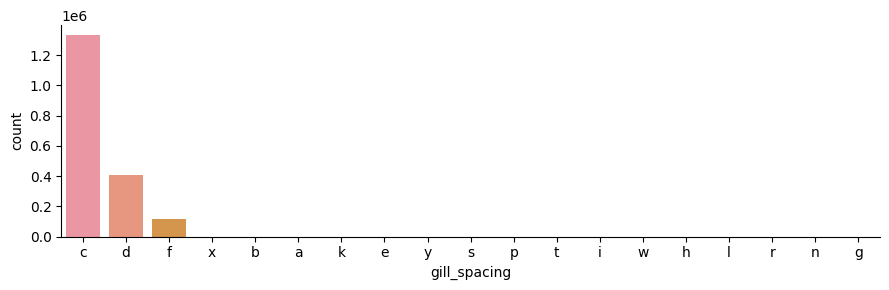

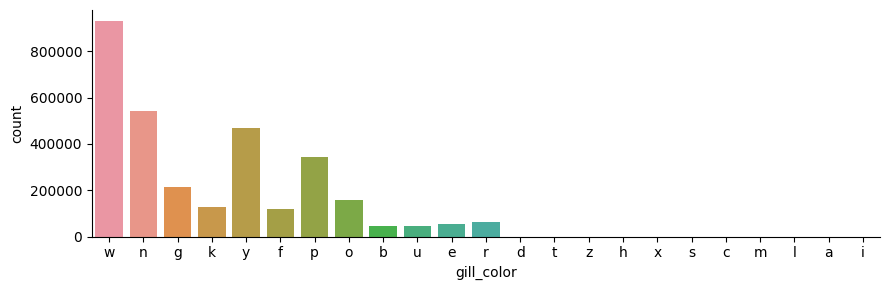

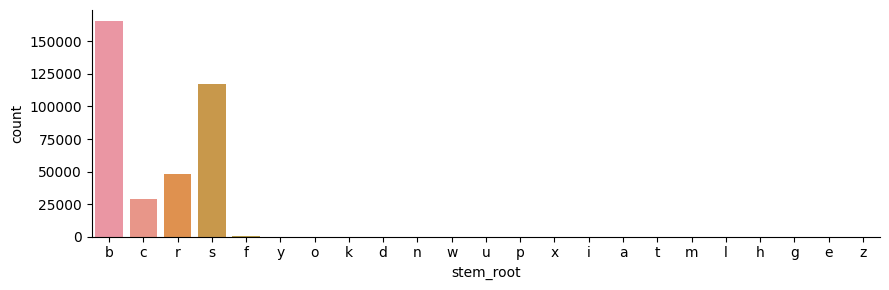

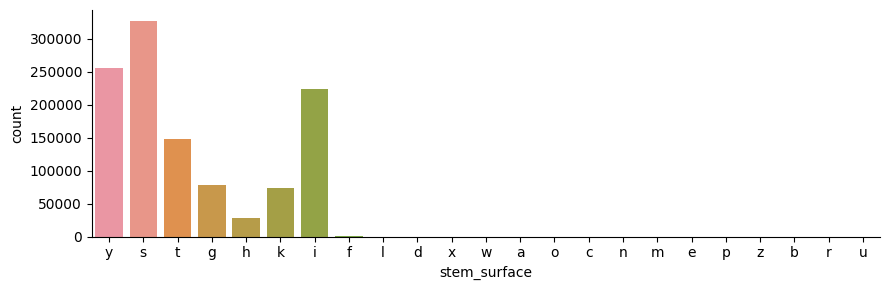

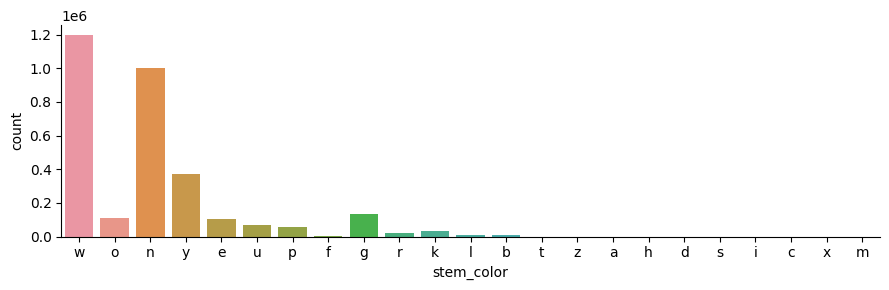

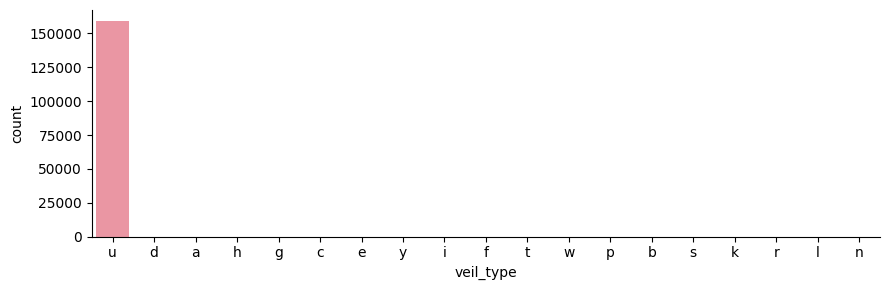

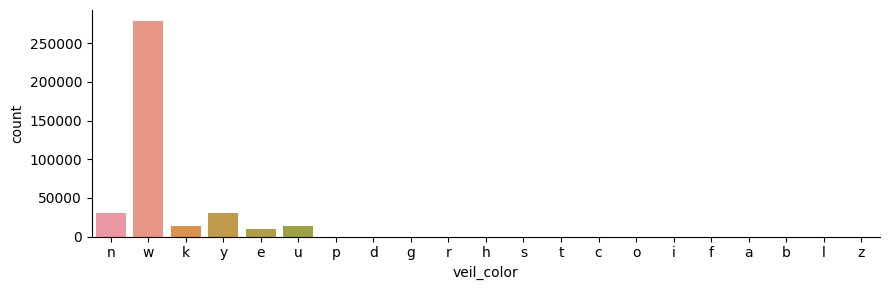

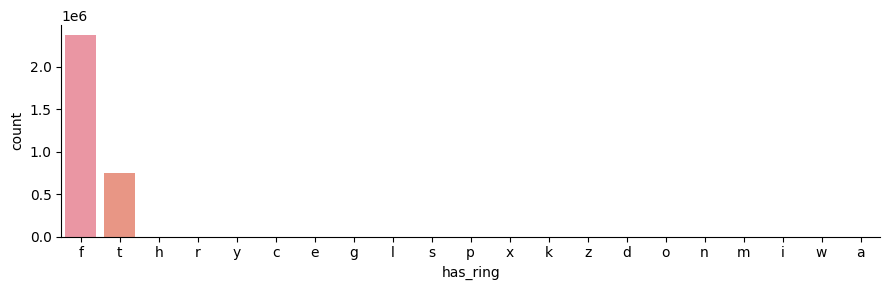

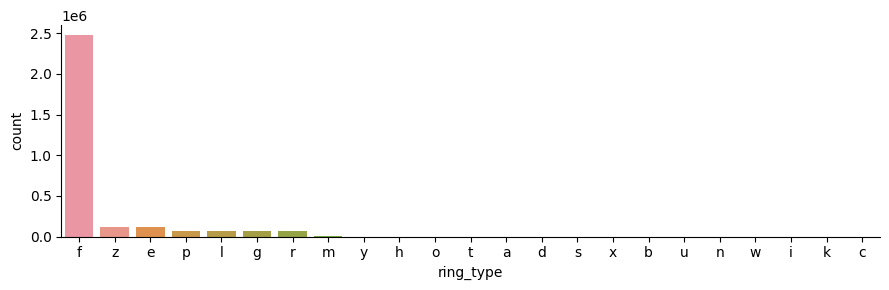

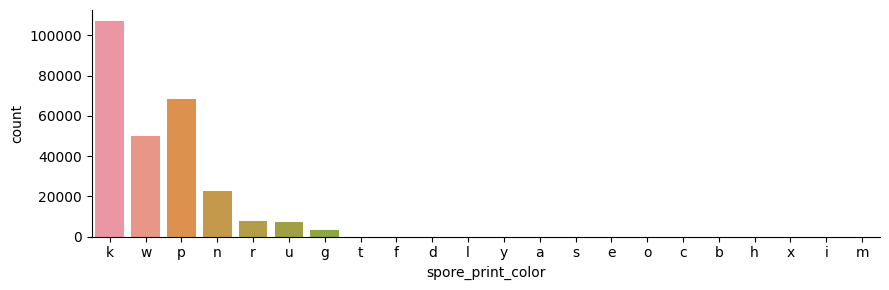

In [153]:
# list('abcdefghijklmnopqrstuvwxyz')
atoz = [chr(i) for i in range(ord('a'), ord('z')+1)]

def non_alpha_categories_removal(df, col, atoz):
    len_before = df.shape
    df = df[df[col].isin(atoz+[np.nan])]
    len_after = df.shape
    print(f"'{col}' processed. {len_before-len_after} records removed")
    sns.catplot(df, kind="count", x =col, height=2, aspect=2)
    return df


for col in ['gill_attachment', 'gill_spacing', 'gill_color',
            'stem_root', 'stem_surface', 'stem_color', 'veil_type', 
            'veil_color', 'has_ring', 'ring_type', 'spore_print_color', 'habitat']:
    mdf = non_alpha_categories_removal(mdf,col, atoz)

In [154]:
mdf.shape

(3116322, 21)

In [156]:
mdf.season.value_counts()

season
a    1542983
u    1153353
w     278153
s     141833
Name: count, dtype: int64